# 시각화 및 정확도 측정

목차
1. [모듈 불러오기](#1-모듈-불러오기)
2. [설정 값 세팅](#2-설정-값-세팅)
3. [정확도 측정](#3-정확도-측정)
4. [시각화 출력](#4-시각화-출력)

본 file은 code_for_run_in_d-wave.ipynb file에서 출력된 결과를 검증한다.

#### 1. 모듈 불러오기

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pickle
import sympy as sym
import math

#### 2. 설정 값 세팅
아래 설정 값은 code_for_make_formula.ipynb file에서 설정한 값과 동일해야 한다.

In [51]:
TABLE_BIT = 2 # 수업 종류를 나타내는 비트 수
TABLE_WIDTH = 2 # 시간표 가로
TABLE_LENGTH = 2 # 시간표 세로
TABLE_COUNT = 2 # 반의 수(시간표 개수)

CLASS_LIST = {  # 수업 시수
  'free': 2,
  'class1': 1,
  'none1': 1,
  'none2': 0.
  # (수업 이름):(수업 횟수)
}

CLASS_MILD_STEEL_LIST = {  # 연강
  'free': 2,
  # (수업 이름):(수업 횟수)
}

CLASS_NUM_LIST = {
  'free': 0,
  'class1': 1,
  'none1': 2,
  'none2': 3,
  # (수업 이름):(수업 횟수)
}

#### 3. 정확도 출력
result에 code_for_run_in_d-wave.ipynb file에서 출력된 결과를 대입한다.

In [52]:
result = {'v0': 0,
 'v1': 0,
 'v10': 1,
 'v11': 0,
 'v12': 0,
 'v13': 0,
 'v14': 0,
 'v15': 0,
 'v2': 0,
 'v3': 0,
 'v4': 1,
 'v5': 0,
 'v6': 0,
 'v7': 1,
 'v8': 0,
 'v9': 1}

data_ = []
for i in range(0, TABLE_BIT * TABLE_COUNT * TABLE_LENGTH * TABLE_WIDTH):
    data_.append(result['v' + str(i)])

var_list = []
for i in range(0, TABLE_BIT * TABLE_COUNT * TABLE_LENGTH * TABLE_WIDTH):
  var_list.append(sym.symbols('v' + str(i)))
class_bit_count = math.ceil(math.log(len(CLASS_LIST),2))

f = open('poly.txt', 'r')
poly = sym.simplify(f.read())
f.close()
cost = poly.evalf(subs=dict(zip(var_list, (0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0))))
print('Cost : ', cost)

[0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]
Cost :  0.e-124


Cost 값으로 출력된 결과가 0.e-124(= 0)이면 조건에 모두 만족하는 시간표를 생성한 것이다. 비단 다른 값을 가진다면 조건이 시간표 생성에 불가한 조건이거나, quantum annealer를 통해 최적의 값을 구하지 못한 것이다.

#### 4. 시각화 출력
본 code는 생성된 시간표를 시각화하여 출력한다. list color의 값을 변경하여 시간표의 색을 설정할 수 있다.

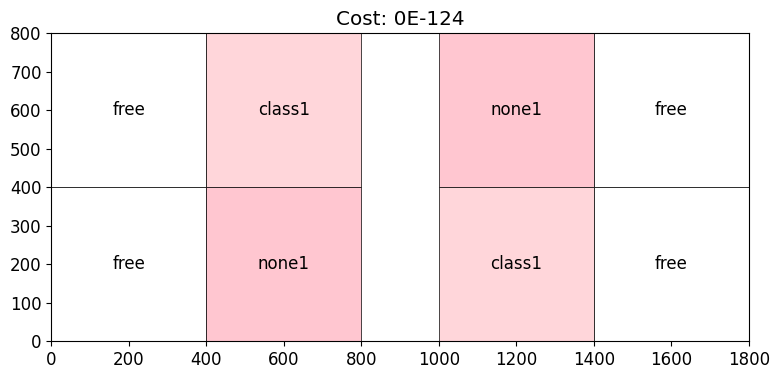

In [53]:
class_names = list(CLASS_LIST.keys())
rect = []
for i in range(0, TABLE_COUNT):
    for x in range(0, TABLE_WIDTH):
        for y in range(0, TABLE_LENGTH):
            rect.append((x * 400 + (200 + 400 * TABLE_WIDTH) * i, 400 * TABLE_LENGTH - (y + 1) * 400, 400, 400))

plt.style.use('default')
plt.rcParams['figure.figsize'] = ((TABLE_WIDTH * 2 + 1) * TABLE_COUNT - 1, TABLE_LENGTH * 2)
plt.rcParams['font.size'] = 12

color = ['white', '#FFD6DA', '#FFC6D0', '#E1E7E7', '#D1EAF5', '#C3D6F2', '#789CCE']
count = 0

# 3. add_patch()로 도형 (patches) 시각화하기
fig, ax = plt.subplots()

for (x, y, w, h) in rect:
    sum = 0
    for bit in range(0, TABLE_BIT):
        sum += (2 ** bit) * data_[count * TABLE_BIT + bit]
    ax.add_patch(
        patches.Rectangle(
            (x, y), w, h,
            edgecolor='black',
            facecolor=color[sum],
            linewidth=0.5,
            fill=True))
    plt.annotate(class_names[sum], (x + (w / 2), y + (h / 2)), ha = 'center', va = 'center')
    count+=1

# 4. 그래프 설정 및 띄우기
ax.set_xlim(0, 200 * (TABLE_WIDTH * 2 + 1) * TABLE_COUNT - 200)
ax.set_ylim(0, 400 * TABLE_LENGTH)
min_costs = poly.evalf(subs=dict(zip(var_list, (0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0))))
plt.title(f'Cost: {min_costs}')
plt.show()
plt.close()